In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

if data file upload is hamperd any how, it will create problem and show !!ERROR!!

In [12]:
df=pd.read_csv('/content/WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [13]:
df['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [14]:
df['text'][72131]

'Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.\n\nThe Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary\'s capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart \'due to safety reasons until further notice!\'\n\n"Many migrants, who couldn\'t understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.\n\nScuffles broke out when police ordered the passengers off the train at Bicske, according to

In [15]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


DROPPING UNNAMED : 0 COLUMN

In [17]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [18]:
to modify the null value we need to use fillna() function. In function body, we need to upload null string

SyntaxError: invalid syntax (<ipython-input-18-84eaca2f32c0>, line 1)

In [20]:
#uploading null value in empty text column
df.fillna(' ',inplace=True)
features = df[['title','text']]
labels= df['label']

the data frame which is stored in "df variable" spilit into 2 variable. i)feature, ii)labels.
feature = this variable contains 'title' ,
         'text' column
label = this variable contains 'label'   
         column         

In [21]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

Now we draw a BAR to see the lable column's result. Is the dataset balanced or not?

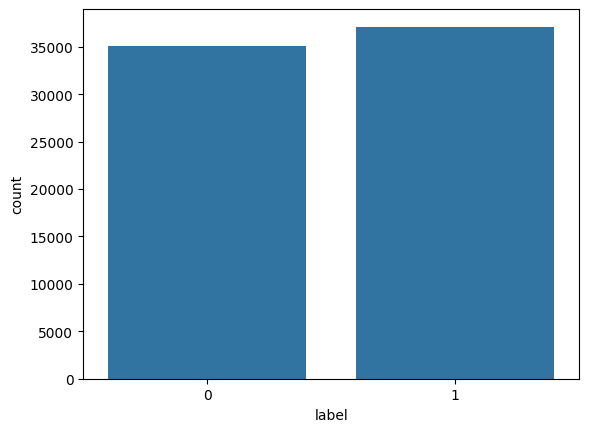

In [38]:
 sns.countplot(x='label', data=df)
 plt.show()

Now we use direct function to see the lable column's result. Is the dataset balanced or not?

In [23]:
df['label'].value_counts()
# OR,,, a =df['label'].value_counts()
      # print(a)


label
1    37106
0    35028
Name: count, dtype: int64

Now we draw a pie chart to see the lable column's result. Is the dataset balanced or not?
label 0 = SPAM
label 1 = HAM



In [24]:
a=df['label'].value_counts()
transaction = a.index
quantity=a.values
fig = px.pie(df, names=transaction, values = quantity, hole=0.5, title="spam & ham status")
fig.show()

by Word cloud we can handle which words mostly used in the dataset

In [25]:
def plot_wordcloud(text, title):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)

fake =' '.join(df[df['label'] == 0]['text'])
real =' '.join(df[df['label'] == 1]['text'])


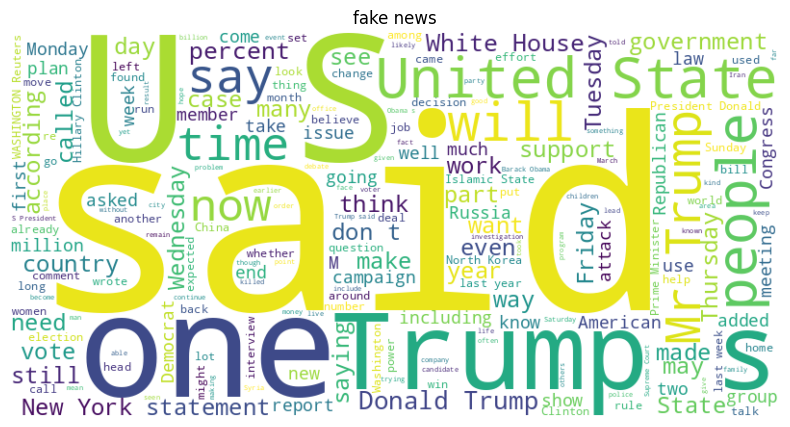

In [26]:
plot_wordcloud(fake, 'fake news')
plt.show()

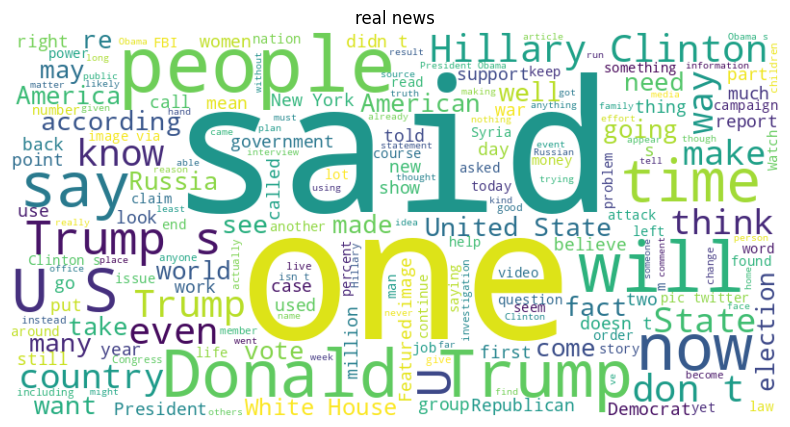

In [27]:
plot_wordcloud(real,'real news')
plt.show()

TEXT  PREPROCESSING


In [28]:
text_column='text'
label_column='label'

generally stop words never have potential value.

In [29]:
import nltk
nltk.download('stopwords')

stopword = set(stopwords.words('english'))
stopword

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [30]:
def preprocess_text(text):
         #REMOVE Punctuation (remove_punc ei variable e string.punctuation libraryr kono punctuation thakbe na)
  remove_punc = [char for char in text if char not in string.punctuation]
  clean_words = ''.join(remove_punc)
         # REMOVE stopwords (clean_words variable er modde kono punctuation nai, ei variable ke amra split kore er theke stop word ke alada korlam)
  text= ([word for word in clean_words.split() if word.lower() not in stopword ])
         #jara jara stopwords na tara text variable e bosbe
  return text


In [31]:
df[text_column]= df[text_column].apply(preprocess_text)
df[text_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

LEMMATIZATION
example= "hackers word" will be "hacker"

In [32]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
  return lemmatized_text

df[text_column]= df[text_column].apply(lemmatize_text)
df[text_column]


[nltk_data] Downloading package wordnet to /root/nltk_data...


0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

In [34]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df[text_column])
y= df[label_column]

TRAIN / TEST Split

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.2, random_state=42)



In [65]:
def evaluate_model(model, xtest, ytest):
  y_pred = model.predict(xtest)
  accuracy= accuracy_score(ytest, y_pred)
  cm=confusion_matrix(ytest, y_pred)
  prob= model.predict_proba(xtest)[:,1]
  roc_auc= roc_auc_score(ytest, prob)
  fpr, tpr, rhresholds = roc_curve(ytest, prob)
  precision,recall, _ =precision_recall_curve(ytest,prob)
  pr_auc= auc(recall,precision)
  return {
      'Accuracy':accuracy,
      'Confusion Matrix':cm,

  }

MULTINOMIAL NAIVE BAYES

In [85]:
mnb=MultinomialNB(alpha=1.0,fit_prior=True,class_prior= None)
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
nb_result=evaluate_model(mnb,xtest,ytest)
nb_result

{'Accuracy': 0.8797393775559714,
 'Confusion Matrix': array([[6528,  561],
        [1174, 6164]])}

EVALUTE MANUALLY


In [88]:
cm1= confusion_matrix(ytest, mnb.predict(xtest))
cm1

array([[6528,  561],
       [1174, 6164]])

true positive = 6528 and true negative= 6164

In [90]:
b=classification_report(ytest, mnb.predict(xtest))
print(b)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7089
           1       0.92      0.84      0.88      7338

    accuracy                           0.88     14427
   macro avg       0.88      0.88      0.88     14427
weighted avg       0.88      0.88      0.88     14427



In [ ]:
LOGISTIC REGRESSION


In [92]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [73]:
b=classification_report(ytest, lr.predict(xtest))
print(b)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7089
           1       0.94      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



In [74]:
cm= confusion_matrix(ytest, lr.predict(xtest))
cm

array([[6674,  415],
       [ 267, 7071]])

bam kona barle good... karon tokhon true positive=6674 and true negative=7071 is high

BOURNALLE


In [79]:
B= BernoulliNB()
B.fit(xtrain,ytrain)


BernoulliNB()

In [81]:
c=classification_report(ytest, B.predict(xtest))
print(c)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7089
           1       0.83      0.90      0.87      7338

    accuracy                           0.86     14427
   macro avg       0.86      0.86      0.86     14427
weighted avg       0.86      0.86      0.86     14427



In [83]:
cm3= confusion_matrix(ytest, B.predict(xtest))
cm3

array([[5770, 1319],
       [ 738, 6600]])

NOW WE GET SOME I/P FROM USER  

In [94]:
#list e 3 ta model rakhlam
MODELS=[mnb, lr, B ]

In [100]:
random_text=input()
preprocessed_text=preprocess_text(random_text)
lemmatized_text=lemmatize_text(preprocessed_text)
text_vector=vectorizer.transform([lemmatized_text])

No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to 

In [102]:
for model in MODELS:
  prediction= model.predict(text_vector)
  print(f"model:{type(model).__name__}")
  print("Prediction:",prediction)

model:MultinomialNB
Prediction: [1]
model:LogisticRegression
Prediction: [1]
model:BernoulliNB
Prediction: [1]


Deploy the model in web.
how to save this file in pickle

In [104]:
import pickle
#define a file path where u want to save the model
model_file_path= 'logistic_regression_model.pkl'
#save the model to the file

with open (model_file_path,'wb') as model_file:
     pickle.dump(lr,model_file )

LOAD THE MODEL

In [105]:
with open(model_file_path,'rb') as model_file:
  loaded_model=pickle.load(model_file)

In [106]:
loaded_model.predict(xtest)

array([1, 1, 0, ..., 1, 1, 1])

In [109]:
!pip install scikit-learn
loaded_model.score(xtest,ytest)

0.9527275247799265

In [110]:
loaded_model.predict(text_vector)

array([1])